In [1]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import cv2
import torch
import pickle
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

from sklearn.model_selection import ParameterGrid

In [2]:
if 0:
    import glob
    import joblib
    import os
    from PIL import Image
    import imagehash
    from tqdm.auto import tqdm

    paths = glob.glob('../input/petfinder-adoption-prediction/*/*jpg')

    result = joblib.Parallel(n_jobs=-1, verbose=1)(joblib.delayed(lambda x: imagehash.average_hash(Image.open(x)))(path) for path in paths)


    tmp = pd.DataFrame()
    tmp['path'] = paths
    tmp['hash'] = result
    tmp['hash'] = tmp['hash'].astype(str)

    tmp['is_train'] = tmp['path'].str.find('train') > -1
    tmp['is_test'] = tmp['path'].str.find('test') > -1
    tmp['idx'] = tmp['path'].map(lambda x: int(x.split('-')[-1][:-4]))
    tmp['PetID'] = tmp['path'].map(lambda x: x.split('/')[-1].split('-')[0])
    
    df1_train = pd.read_csv('../input/petfinder-adoption-prediction/train/train.csv')
    df1_test = pd.read_csv('../input/petfinder-adoption-prediction/test/test.csv')

    df1_train = pd.merge(tmp, df1_train, how='left', on='PetID')

    df1['is_train'] = df1['is_train'].astype(np.float32)
    df1['is_test'] = df1['is_train'].astype(np.float32)
    df1['hash'] = df1['hash'].astype(str)
    #df1 = df1[(df1['is_train'] > 0 ) | (~df1['hash'].isin(df1.loc[df1['is_train'] > 0, 'hash']))].reset_index(drop=True)
    df1.to_csv('df1_train_test.csv', index=False)

In [3]:
import os
from PIL import Image
import imagehash
from tqdm.auto import tqdm
if 0:
    df1 = pd.read_csv('../input/petfinder-adoption-prediction/train/train.csv')
    df1['path'] = '../input/petfinder-adoption-prediction/train_images/' + df1['PetID'] + '-1.jpg'
    df1 = df1[df1['path'].map(os.path.exists)]

    df2 = pd.read_csv('../input/petfinder-pawpularity-score/train.csv')
    df2['path'] = df2['Id'].map(lambda x:str(f'../input/petfinder-pawpularity-score/train/{x}.jpg'))

    df1['hash'] = [imagehash.average_hash(Image.open(x))
                        for x in tqdm(df1['path'].values)]
    df2['hash'] = [imagehash.average_hash(Image.open(x))
                        for x in tqdm(df2['path'].values)]
    #train_df_prev['hash'] = [imagehash.average_hash(Image.open(x))
    #                    for x in tqdm(train_df_prev['path'].values)]

    df1.to_csv('df1.csv', index=False)
    df2.to_csv('df2.csv', index=False)
else:
    #df1 = pd.read_csv('../input/pet-data/df1_train_test_all.csv')
    df1 = pd.read_feather('../input/pet-data/df1_train_test_all_3.ftr')
    
    df2 = pd.read_csv('../input/pet-data/df2.csv')

In [4]:
df1.T

,0,1,2,3,4,5,6,7,8,9,...,72766,72767,72768,72769,72770,72771,72772,72773,72774,72775
PetID,d336e6953,77544cbd4,0149d04e7,cad25c91b,9c7476c25,e01f077a7,449290a8b,6c9382d17,ebdf19959,6a864757b,...,af7305535,f51767bbe,c46f3bb03,ef20ce351,8a69b8ca9,819610fb0,280dd2698,4b393cb28,b88cb23c9,311368756
AdoptionSpeed,1.0,1.0,2.0,3.0,1.0,4.0,3.0,2.0,4.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hash,193f20c0c86c2f2f,0f0f0f3fffffe000,387fef070743071f,0c00003f27e7ffff,ffb301d9f0e08e04,1f1f40602c1e9f9f,ffc7c3c7c3c3d3a7,fff860000083feff,18981c371fff0707,f0fcece060302040,...,0078784cecfdffff,78787c1c18797b38,0261f03cbaf1e87c,0f0f79f1f0f8f8b8,00000c1d9f8fffff,00003e3f3f1f0000,00001c1e6e7f767c,3070380cfbffffff,f000faffe7c3c111,78cf3c0d08e0e0fd
Age,2,15,2,3,3,238,1,3,24,3,...,48,2,2,1,2,48,6,24,17,3
Breed1,39,3,2,2,2,2,0,0,44,2,...,2,3,2,2,3,108,64,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
densenet121_g_svd_27,0.254069,-0.114144,0.609852,0.135064,-0.303049,0.425963,0.423268,0.145562,0.085544,-0.05332,...,-0.458758,-1.236322,0.206634,0.506228,0.143711,-0.636385,0.450589,-0.058638,0.507753,0.128789
densenet121_g_svd_28,0.317335,0.111746,0.68373,-0.508851,0.262996,0.605122,0.328034,0.286753,0.538721,0.174232,...,-0.326162,0.983221,0.248396,0.223462,0.538566,0.651333,0.071948,0.057324,-0.085546,0.345264
densenet121_g_svd_29,0.358104,-0.051447,-0.029349,-0.972488,0.134231,-0.242067,0.111038,-0.079739,0.164546,-0.369274,...,0.503476,1.130372,0.390902,0.044031,-0.346091,-0.044272,0.26286,0.082326,-0.377376,-0.24198
densenet121_g_svd_30,0.97265,0.250463,-0.201216,0.099181,-0.296813,-0.335445,0.034651,0.04295,0.170292,-0.177735,...,-0.25724,-0.599853,-0.190454,-0.210995,0.599771,0.221565,-0.149115,-0.600094,0.243781,-0.518936


In [5]:
df1.shape, df1.hash.nunique(), df2.hash.isin(df1.hash).sum()

((72776, 4842), 70437, 1942)

In [6]:
#df1.to_csv('train_last_comp.csv', index=False)
df = pd.merge(df2, df1, how='left', on='hash')

In [7]:
df

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,...,densenet121_g_svd_22,densenet121_g_svd_23,densenet121_g_svd_24,densenet121_g_svd_25,densenet121_g_svd_26,densenet121_g_svd_27,densenet121_g_svd_28,densenet121_g_svd_29,densenet121_g_svd_30,densenet121_g_svd_31
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,...,-0.232067,-0.402286,-0.327199,0.159988,-0.426902,-0.229353,0.264958,0.089060,-0.123356,-0.066873
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,...,0.365136,0.125687,-0.079556,-0.049332,0.462550,0.414122,-0.286941,-0.137400,-0.593503,0.427345
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,...,-0.150624,0.172347,0.345116,0.010047,0.291980,0.296983,-0.120220,0.273166,0.220303,0.579030
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10013,ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10014,ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10015,ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10016,fff19e2ce11718548fa1c5d039a5192a,0,1,1,1,0,0,0,0,1,...,0.722296,-0.099726,0.148368,-0.335975,0.092861,0.186523,0.054682,-0.529533,-0.270191,0.042101


In [8]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,10008,10009,10010,10011,10012,10013,10014,10015,10016,10017
Id,0007de18844b0dbbb5e1f607da0606e0,0009c66b9439883ba2750fb825e1d7db,0013fd999caf9a3efe1352ca1b0d937e,0018df346ac9c1d8413cfcc888ca8246,001dc955e10590d3ca4673f034feeef2,001dd4f6fafb890610b1635f967ea081,0023b8a3abc93c712edd6120867deb53,0031d6a9ef7340f898c3e05f92c7bb04,0042bc5bada6d1cf8951f8f9f0d399fa,0049cb81313c94fa007286e9039af910,...,ff78a56d5e0029cd6288c62f7b7f10e5,ff903858a9899465ee4cd17e942bef24,ff9b3b3468c4b35a3b6450a1ddc88449,ffaf7bf7e64b9eecaf02fc2c14d6b654,ffb8b466494a3e48bcb874a2fe9b976d,ffbfa0383c34dc513c95560d6e1fdb57,ffcc8532d76436fc79e50eb2e5238e45,ffdf2e8673a1da6fb80342fa3b119a20,fff19e2ce11718548fa1c5d039a5192a,fff8e47c766799c9e12f3cb3d66ad228
Subject Focus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Eyes,1,1,1,1,0,0,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
Face,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
Near,1,0,1,1,1,0,1,0,1,1,...,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
densenet121_g_svd_27,-0.229353,0.414122,0.296983,NaN,NaN,NaN,NaN,NaN,NaN,-0.087184,...,-0.316413,-0.315811,NaN,NaN,NaN,NaN,NaN,NaN,0.186523,NaN
densenet121_g_svd_28,0.264958,-0.286941,-0.12022,NaN,NaN,NaN,NaN,NaN,NaN,0.050286,...,-0.343457,-0.250562,NaN,NaN,NaN,NaN,NaN,NaN,0.054682,NaN
densenet121_g_svd_29,0.08906,-0.1374,0.273166,NaN,NaN,NaN,NaN,NaN,NaN,-0.193098,...,-0.244467,0.182118,NaN,NaN,NaN,NaN,NaN,NaN,-0.529533,NaN
densenet121_g_svd_30,-0.123356,-0.593503,0.220303,NaN,NaN,NaN,NaN,NaN,NaN,-0.319511,...,0.013325,0.034657,NaN,NaN,NaN,NaN,NaN,NaN,-0.270191,NaN


In [9]:
df2.columns

Index(['Id', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory',
       'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur', 'Pawpularity',
       'path', 'hash'],
      dtype='object')

In [10]:
df.columns

Index(['Id', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory',
       'Group', 'Collage', 'Human',
       ...
       'densenet121_g_svd_22', 'densenet121_g_svd_23', 'densenet121_g_svd_24',
       'densenet121_g_svd_25', 'densenet121_g_svd_26', 'densenet121_g_svd_27',
       'densenet121_g_svd_28', 'densenet121_g_svd_29', 'densenet121_g_svd_30',
       'densenet121_g_svd_31'],
      dtype='object', length=4857)

In [11]:
#df = pd.read_csv('../exps/exp1_swin_large_patch4_window12_384/train_cv_score.csv')
#df = pd.read_csv('ens_exp15.csv')

[0.5178882  0.16358161 0.32366979]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  from ipykernel import kernelapp as app


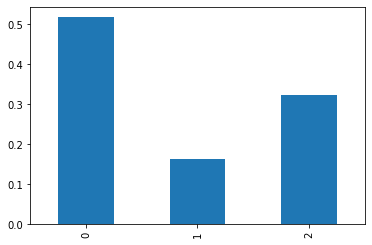

In [12]:
train = pd.read_csv('../input/petfinder-pawpularity-score/train.csv')['Id'].map(lambda x:str(f'../input/petfinder-pawpularity-score/train/{x}.jpg'))
oof = pd.concat([train,
                 pd.read_csv('../input/petfinder-ensumble/exp085_ensumble/exp085_ensumble_oof.csv')['oof']], 
                 axis=1).set_index('Id')['oof']/100
oof2 = pd.concat([train,
                 pd.read_csv('../input/exp108/exp108_oof.csv')['pred']], 
                 axis=1).set_index('Id')['pred']/100


#df['pred4'] = df['path_x'].map(pd.read_csv('../input/pet-data/ens_exp15.csv', index_col='path')['pred'])
df['pred1'] = df['path'].map(pd.read_csv('../input/pet-data/ens_exp4-7-8-9-15.csv', index_col='path')['pred'])
df['pred2'] = df['path'].map(oof)
df['pred3'] = df['path'].map(oof2)

coef = np.linalg.lstsq(df[['pred1', 'pred2', 'pred3']], df['Pawpularity'] / 100)[0]
print(coef)
pd.Series(coef).plot(kind='bar')

df['pred'] = np.dot(df[['pred1', 'pred2', 'pred3']], coef)

In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

df['fold'] = -1


N_FOLDS = 5
strat_kfold = StratifiedKFold(n_splits=5, random_state=365, shuffle=True)
for i, (_, train_index) in enumerate(strat_kfold.split(df.index, df['Pawpularity'])):
    df.loc[train_index, 'fold'] = i

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [14]:
COL_FEATURES = ['Blur', 
                #'Face', 
                #'Occlusion',
                'Eyes',
                #'Accessory',
               #'Group',
                #'Human',
                #'Near',
                #'Collage',
                #'Info',# 
                #'Action',
                
                'pred',
                #'pred1', 'pred2', 'pred3', 'pred4',
                
                #'len_desc', 'len_name', 
                #'len_word_desc', 'len_word_name',
                #'isin'
                #'breed_label', 'breed_prob',
                #'img_h', 'img_w',
                #'det_label', 'det_left', 'det_top', 'det_right', 'det_bottom', 'det_prob'
               ] + df1.drop(['Name', 'RescuerID', 'Description', 'PetID', 'path', 'hash',
                             'Type', 'VideoAmt', 'Sterilized', 'MaturitySize', 'Health', 'Dewormed',
                             'idx'
                            ], axis=1, errors='ignore').columns.tolist()
COL_FEATURES = np.load('opt_1stplace.npy')[:159]

In [15]:
def rmse(preds, train_data):
    labels = train_data.get_label()
    #import pdb;pdb.set_trace()
    loss = np.sqrt(((labels - preds.clip(0.01, 1)) ** 2).mean()) * 100
    
    #loss = np.sqrt(((labels - preds.reshape(-1, 100).argmax(axis=1)) ** 2).mean())
    return 'rmse', loss, False


def train(fold, param):
     
    X_train = df.loc[df['fold'] != fold, COL_FEATURES]
    y_train = df.loc[df['fold'] != fold, 'Pawpularity'].values / 100
    
    X_valid = df.loc[df['fold'] == fold, COL_FEATURES]
    y_valid = df.loc[df['fold'] == fold, 'Pawpularity'].values / 100
    
    train_data = lgb.Dataset(X_train, label=y_train)
    valid_data = lgb.Dataset(X_valid, label=y_valid)
    
    model = lgb.train(param,
                      train_data,
                      valid_sets=valid_data,
                      #early_stopping_rounds=50,
                      verbose_eval=100,
                      feval=rmse
                      )
    model.val_data = (model.predict(X_valid), y_valid)
    return model

def train_all(param):
     
    X_train = df.loc[:, COL_FEATURES]
    y_train = df.loc[:, 'Pawpularity'].values  / 100
    
    X_valid = df.loc[:, COL_FEATURES]
    y_valid = df.loc[:, 'Pawpularity'].values  / 100
    
    train_data = lgb.Dataset(X_train, label=y_train)
    valid_data = lgb.Dataset(X_valid, label=y_valid)
    
    model = lgb.train(param,
                      train_data,
                      valid_sets=valid_data,
                      early_stopping_rounds=50,
                      verbose_eval=100,
                      feval=rmse
                      )
    return model

In [16]:
if 0:
    all_params = {'objective': ['mse'],
                  #'tweedie_variance_power': [1.2],
                 'verbosity': [-1],
                 'boosting_type': ['gbdt'],
                 'feature_pre_filter': [False],
                 'bagging_fraction': [1],
                 'bagging_freq': [1],
                 'num_iterations': [10000],
                 'early_stopping_round': [100],
                 'n_jobs': [16],
                 'seed': [114],
                 'metric':  ['None'],  # trial.suggest_categorical('metric', ['auc', 'binary_logloss', ]), #'auc',
                 'learning_rate': [0.05],
                  'lambda_l1': [0],
                  'lambda_l2': [1],
                  'min_child_samples': [150, 200],
                  'num_leaves': [7],
                  'feature_fraction': [0.8, 0.9, 0.7],
                  'min_gain_to_split': [0.02, 0.01],
                  'linear_tree': [False],
                  #'max_bins': [8, 16, 32, 62, 128, 256, 512]
                 }
else:
    all_params = {'objective': ['mse'],
                  'tweedie_variance_power': [1.2],
                 'verbosity': [-1],
                 'boosting_type': ['gbdt'],
                 'feature_pre_filter': [False],
                 'bagging_fraction': [0.7],
                 'bagging_freq': [1],
                 'num_iterations': [10000],
                 'early_stopping_round': [100],
                 'n_jobs': [16],
                 'seed': [114],
                 'metric':  ['None'],  # trial.suggest_categorical('metric', ['auc', 'binary_logloss', ]), #'auc',
                 'learning_rate': [0.05],
                  'lambda_l1': [0],
                  'lambda_l2': [1],
                  'min_child_samples': [140],
                  'num_leaves': [7],
                  'feature_fraction': [0.7],
                  'min_gain_to_split': [0.02],
                  'linear_tree': [False],
                  #'max_bins': [8, 16, 32, 62, 128, 256, 512]
                 }

In [17]:
best_score = 1.0e10
best_param = None
models = []
for param in tqdm(ParameterGrid(all_params)):
    print(param)
    list_loss = []
    list_imp = []
    list_num = []
    for fold in range(5):
        model = train(fold, param)
        models.append(model)
        sc = model.best_score['valid_0']['rmse']# * 100
        list_loss.append(sc)
        list_num.append(model.best_iteration)
        
        imp = pd.DataFrame(model.feature_importance(), columns=['imp'])
        imp['col'] = COL_FEATURES
        list_imp.append(imp.set_index('col'))
    sc = np.mean(list_loss)
    if sc < best_score:
        best_score = sc
        best_param = param

  0%|          | 0/1 [00:00<?, ?it/s]

{'bagging_fraction': 0.7, 'bagging_freq': 1, 'boosting_type': 'gbdt', 'early_stopping_round': 100, 'feature_fraction': 0.7, 'feature_pre_filter': False, 'lambda_l1': 0, 'lambda_l2': 1, 'learning_rate': 0.05, 'linear_tree': False, 'metric': 'None', 'min_child_samples': 140, 'min_gain_to_split': 0.02, 'n_jobs': 16, 'num_iterations': 10000, 'num_leaves': 7, 'objective': 'mse', 'seed': 114, 'tweedie_variance_power': 1.2, 'verbosity': -1}


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 17.2334
[200]	valid_0's rmse: 17.1634
[300]	valid_0's rmse: 17.1165
[400]	valid_0's rmse: 17.0882
[500]	valid_0's rmse: 17.0731
[600]	valid_0's rmse: 17.058
[700]	valid_0's rmse: 17.0519
[800]	valid_0's rmse: 17.0497
[900]	valid_0's rmse: 17.0605
Early stopping, best iteration is:
[804]	valid_0's rmse: 17.0484
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 16.6945
[200]	valid_0's rmse: 16.6127
[300]	valid_0's rmse: 16.5909
[400]	valid_0's rmse: 16.5995
Early stopping, best iteration is:
[319]	valid_0's rmse: 16.5811
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 16.8309
[200]	valid_0's rmse: 16.7561
[300]	valid_0's rmse: 16.7366
[400]	valid_0's rmse: 16.7021
[500]	valid_0's rmse: 16.6942
Early stopping, best iteration is:
[453]	valid_0's rmse: 16.6908
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rm

In [18]:
17.122953793907463
17.12237161917507
17.12206798235878
17.035855591812624
17.012832654542915
17.007733147459998
16.980743286686046
16.96459803690594
17.006465753639866
print(best_param)
print(best_score)

{'bagging_fraction': 0.7, 'bagging_freq': 1, 'boosting_type': 'gbdt', 'early_stopping_round': 100, 'feature_fraction': 0.7, 'feature_pre_filter': False, 'lambda_l1': 0, 'lambda_l2': 1, 'learning_rate': 0.05, 'linear_tree': False, 'metric': 'None', 'min_child_samples': 140, 'min_gain_to_split': 0.02, 'n_jobs': 16, 'num_iterations': 10000, 'num_leaves': 7, 'objective': 'mse', 'seed': 114, 'tweedie_variance_power': 1.2, 'verbosity': -1}
16.816028203085388


In [35]:
#df1[['PetID', 'hash'] + [c for c in COL_FEATURES if c in df1]].to_feather('best_1st.ftr')

In [19]:
best_param['num_iterations'] = round(np.mean(list_num) * 1.1)

In [20]:
model = train_all(best_param)

Training until validation scores don't improve for 100 rounds


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's rmse: 16.5628
[200]	valid_0's rmse: 16.1839
[300]	valid_0's rmse: 15.9392
[400]	valid_0's rmse: 15.7733
[500]	valid_0's rmse: 15.6463
Did not meet early stopping. Best iteration is:
[536]	valid_0's rmse: 15.6069


In [21]:
aaa = 0
for i in range(5):
    aaa += np.sqrt(((df.loc[df['fold']==i, 'pred'] * 100 - df.loc[df['fold']==i, 'Pawpularity']) ** 2).mean())
aaa / 5

17.101619959755492

In [22]:
with open('model_lgb_last_comp_all.pkl', 'wb') as f:
    pickle.dump(model, f, -1)

In [23]:
#imp = pd.DataFrame(model.feature_importance(importance_type='gain'), columns=['imp'])
#imp['col'] = COL_FEATURES
pd.options.display.max_rows = 10000
imp = sum(list_imp) / 5
imp[imp.imp > 0]
imp.sort_values('imp', ascending=False).index.values.tolist()#[:30]

['pred',
 'diff_sum_Age_groupby_Type_Breed1_Breed2',
 'densenet121_g_svd_18',
 'gnvec4',
 'gnvec172',
 'tfidf_g_svd_14',
 'gnvec2',
 'glove_mag231',
 'inception_resnet_174',
 'dense121_2_201',
 'color_red_score_var_min',
 'dense121_2_112',
 'inception_resnet_87',
 'sentiment_entities_tfidf_g_svd_2',
 'gnvec95',
 'dense121_2_96',
 'dense121_2_75',
 'inception_resnet_4',
 'count3_bm25_3',
 'inception_resnet_30',
 'dense121_2_3',
 'inception_resnet_223',
 'gnvec13',
 'dense121_2_221',
 'gnvec100',
 'glove_mag139',
 'gnvec66',
 'glove_mag174',
 'inception_resnet_86',
 'Eyes',
 'gnvec90',
 'dense121_2_126',
 'dense121_2_236',
 'gnvec58',
 'dense121_2_36',
 'glove_mag200',
 'dense121_2_227',
 'inception_resnet_349',
 'tfidf_g_svd_7',
 'dense121_2_45',
 'dense121_2_255',
 'gnvec137',
 'dense121_2_127',
 'gnvec28',
 'inception_resnet_158',
 'color_score_amax_first',
 'dense121_2_215',
 'inception_resnet_90',
 'glove_mag125',
 'dense121_2_230',
 'inception_resnet_319',
 'gnvec193',
 'Blur',
 'c

In [24]:
#np.save('opt_1stplace', imp.sort_values('imp', ascending=False).index.values.astype(str))

In [25]:
#df.to_feather('opt_1stplace.ftr')

In [26]:
model.feature_name()

['pred',
 'Blur',
 'Eyes',
 'inception_resnet_87',
 'gnvec172',
 'dense121_2_75',
 'count3_bm25_3',
 'glove_mag20',
 'dense121_2_112',
 'gnvec115',
 'inception_resnet_336',
 'gnvec13',
 'inception_resnet_174',
 'Friendly_Toward_Strangers_main_breed_all',
 'gnvec109',
 'dense121_2_181',
 'dense121_2_36',
 'dense121_2_126',
 'dense121_2_96',
 'diff_var_Quantity_groupby_Type_Breed1',
 'inception_resnet_312',
 'glove_mag165',
 'dense121_2_210',
 'gnvec100',
 'glove_mag116',
 'gnvec193',
 'glove_mag200',
 'glove_mag231',
 'dense121_2_48',
 'glove_mag192',
 'dense121_2_68',
 'gnvec69',
 'gnvec238',
 'glove_mag45',
 'dense121_2_3',
 'dense121_2_119',
 'glove_mag174',
 'diff_var_Age_groupby_Type_Breed1_Breed2',
 'dense121_2_127',
 'gnvec58',
 'glove_mag177',
 'color_red_score_amin_min',
 'inception_resnet_319',
 'diff_sum_Age_groupby_State',
 'General_Health_main_breed_all',
 'glove_mag297',
 'mean_FurLength_k_groupby_RescuerID',
 'tfidf2_nmf_0',
 'inception_resnet_315',
 'dense121_2_92',
 'de